**Question 1a**:   
a Prepare the data and perform an exploratory data analysis, prepare a plot of the time taken against different days for each of meal type.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

Data 

In [34]:
df = pd.read_csv("Mess_Timmings.csv",delimiter=",")

In [35]:
df.head()

,Eating time,Meal Category,Day_No,Holiday,Class after,Day
0,27,1,1,0,0,1
1,38,2,1,0,0,1
2,13,3,1,0,0,1
3,26,4,1,0,0,1
4,27,1,2,0,0,2


Exploratory Data Analysis

In [36]:
df.describe()

,Eating time,Meal Category,Day_No,Holiday,Class after,Day
count,56.000000,56.000000,56.00000,56.000000,56.000000,56.0000
mean,24.303571,2.500000,7.50000,0.428571,0.142857,4.0000
std,9.302824,1.128152,4.06761,0.499350,0.353094,2.0181
min,7.000000,1.000000,1.00000,0.000000,0.000000,1.0000
25%,15.750000,1.750000,4.00000,0.000000,0.000000,2.0000
50%,26.000000,2.500000,7.50000,0.000000,0.000000,4.0000
75%,30.000000,3.250000,11.00000,1.000000,0.000000,6.0000
max,40.000000,4.000000,14.00000,1.000000,1.000000,7.0000


In [37]:
df

,Eating time,Meal Category,Day_No,Holiday,Class after,Day
0,27,1,1,0,0,1
1,38,2,1,0,0,1
2,13,3,1,0,0,1
3,26,4,1,0,0,1
4,27,1,2,0,0,2
5,28,2,2,0,1,2
6,9,3,2,0,0,2
7,25,4,2,0,0,2
8,29,1,3,0,0,3
9,32,2,3,0,1,3


Time vs Days for each meal type

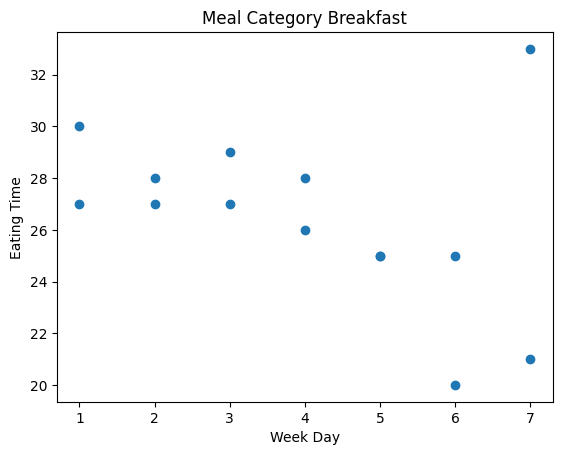

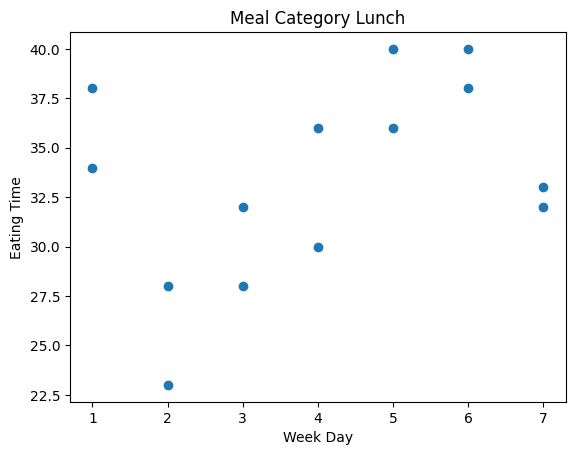

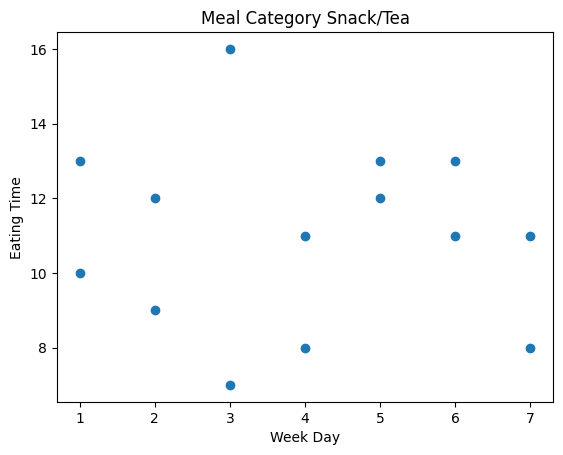

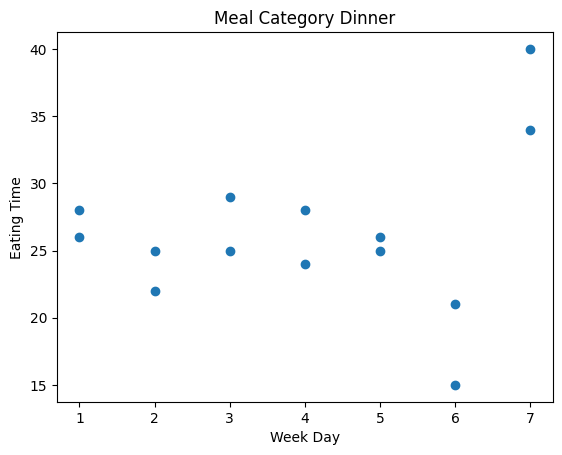

In [38]:
for i in range(1,5):
    new_data = df.loc[(df["Meal Category"] == i)]
    x_val = new_data["Day"]
    y_val = new_data["Eating time"]
    plt.scatter(x_val,y_val)

    plt.xlabel("Week Day")
    plt.ylabel("Eating Time")
    # 1 breakfast, 2 lunch, 3 snack/tea, 4 dinner
    labels = ["Breakfast", "Lunch", "Snack/Tea", "Dinner"]
    plt.title("Meal Category " + labels[i-1])
    plt.show()

Time vs Each Feature

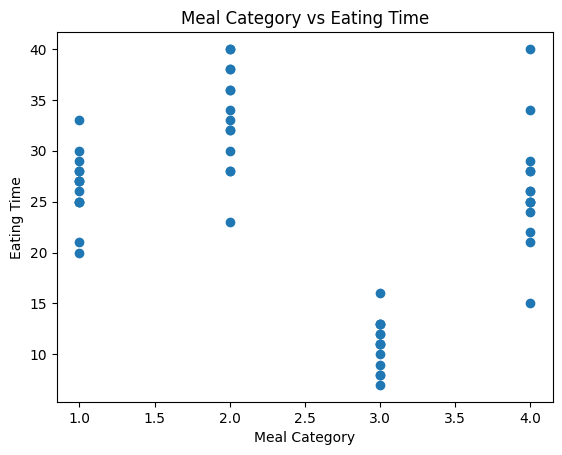

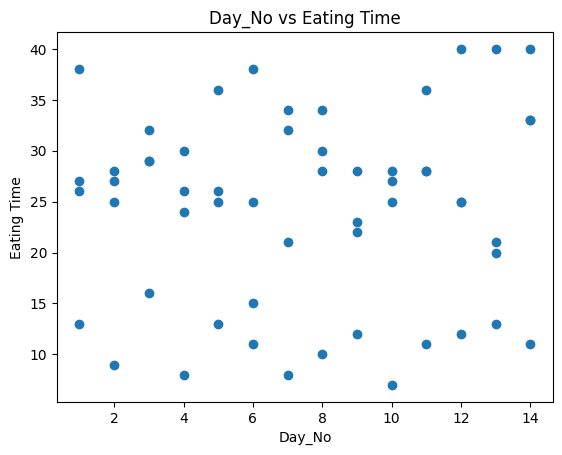

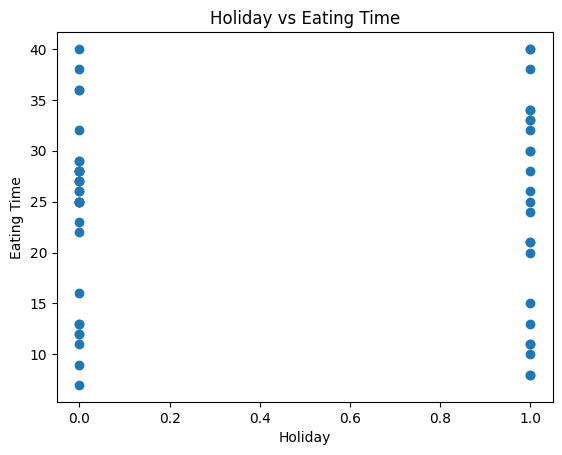

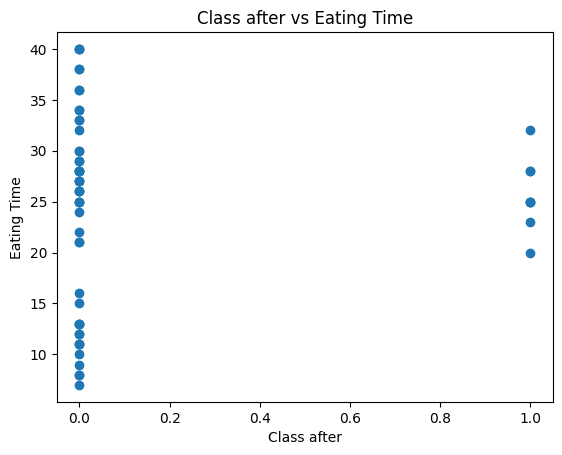

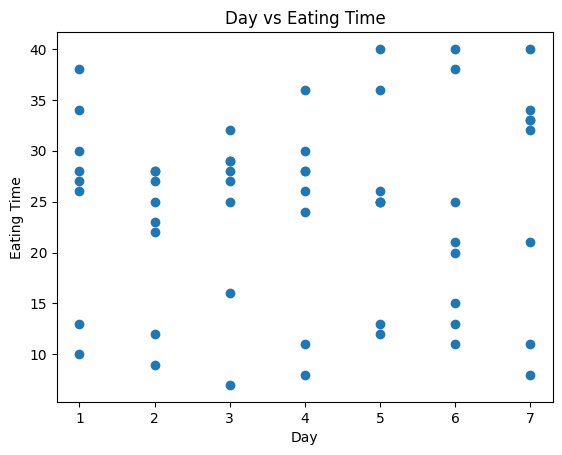

In [39]:
for col in df.columns[1:] :
    x = df[col]
    y = df["Eating time"]
    plt.scatter(x,y)
    plt.xlabel(col)
    plt.ylabel("Eating Time")
    plt.title(col + " vs Eating Time")
    plt.show()

In [40]:
new_data

,Eating time,Meal Category,Day_No,Holiday,Class after,Day
3,26,4,1,0,0,1
7,25,4,2,0,0,2
11,29,4,3,0,0,3
15,24,4,4,1,0,4
19,26,4,5,0,0,5
23,15,4,6,1,0,6
27,34,4,7,1,0,7
31,28,4,8,1,0,1
35,22,4,9,0,0,2
39,25,4,10,0,0,3


**Question 1b**:  
 Due to the nature of the output, we know that linear regression may not be suitable for our problem. Suggest a model to fit the data and learn parameters using Maximum Likelihood estimation using 80% of the data. Code the model and learn the parameters from the data. Analyze the parameter values and figure out which parameter is important for prediction.

Linear Regression construction

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df[['Day','Holiday','Meal Category']],df['Eating time'],test_size=0.2,random_state=42)
y_train

34    12
30    10
8     29
17    36
6      9
4     27
41    36
27    34
47    25
46    12
52    33
15    24
9     32
16    25
24    21
31    28
53    33
48    20
25    32
11    29
32    28
49    40
37    28
29    34
40    28
1     38
21    38
2     13
43    28
39    25
35    22
23    15
45    40
10    16
22    11
18    13
55    40
20    25
7     25
42    11
14     8
28    30
51    21
38     7
Name: Eating time, dtype: int64

In [42]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
linear_predicts = linear_regression.predict(X_test)
mse_linear = mean_squared_error(y_test,linear_predicts)
print(f"LinearRegression mean squared error: {mse_linear}")

LinearRegression mean squared error: 73.54142804686073


<center> <h2>New model (Using poisson regression)</h2></center>

In [43]:
import pandas as pd
from scipy.optimize import minimize

<center> <h3>Let us use netwon ralphson iterative method for parameter estimation</h3></center>

In [44]:
import numpy as np
import math as m
# Calculate the linear predictor for the test data using the estimated coefficients
def model_predictor(X, params):
    intercept = params[0]
    coefficients = params[1:]
    return np.exp(intercept + np.dot(X, coefficients))
    
def gradient_function(params, X, y):
    intercept = params[0]
    coefficients = params[1:]
    linear_predictor = intercept + np.dot(X, coefficients)
    predicted_counts = np.exp(linear_predictor)
    residuals = y - predicted_counts
    intercept_gradient = -np.sum(residuals)
    coefficients_gradient = -np.dot(X.T, residuals)
    return np.concatenate(([intercept_gradient], coefficients_gradient))

def hessian_matrix_inverse(params, X, y):
    intercept = params[0]
    coefficients = params[1:]
    linear_predictor = intercept + np.dot(X, coefficients)
    predicted_counts = np.exp(linear_predictor)
    X_design = np.column_stack((np.ones(X.shape[0]), X))
    V = np.diag(predicted_counts)
    Hessian = np.dot(np.dot(X_design.T, V), X_design)
    return np.linalg.inv(Hessian)

def iterative_method(params, X, y, n_iterations=100, tolerance=1e-6):
    for i in range(n_iterations):
        gradient = gradient_function(params, X, y)
        hessian_inverse = hessian_matrix_inverse(params, X, y)
        params = params - np.dot(hessian_inverse, gradient)
        if np.max(np.abs(gradient)) < tolerance:
            break
    return params

# Initial guess for coefficients (including intercept)
initial_params = np.zeros(X_train.shape[1] + 1)
estimated_params = iterative_method(initial_params, X_train.values, y_train.values, 100, 1e-8)
print("Estimated Parameters:", estimated_params)

Estimated Parameters: [ 3.29249981  0.0329719   0.02611367 -0.09118204]


<center><h3>Lets us estimate using in-built scipy function</h3></center>

In [45]:
def objective_function(params, X, y):
    intercept = params[0]
    coefficients = params[1:]
    linear_predictor = intercept + np.dot(X, coefficients)
    predicted_counts = np.exp(linear_predictor)
    neg_log_likelihood = -np.sum(y * np.log(predicted_counts) - predicted_counts)
    return neg_log_likelihood

In [46]:
# Initial guess for coefficients (including intercept)
initial_params = np.zeros(X_train.shape[1] + 1)

# Minimize the negative log-likelihood function
result = minimize(objective_function, x0=initial_params, args=(X_train.values, y_train.values))

In [47]:
# Extract the estimated coefficients
estimated_params_1 = result.x
print("Estimated Paramters:", estimated_params)


Estimated Paramters: [ 3.29249981  0.0329719   0.02611367 -0.09118204]


**Question 1c**:  
Use the learned model to do prediction.For prediction,you may consider 20% of the collecteddata.Provide an appropriate evaluation metric and compare the results of the prediction of your model with alinear regression model(youmay use existing packages like scikit-learn for linear regression).

In [48]:

print(f"LinearRegression root mean squared error: {m.sqrt(mse_linear)}\n")

print("Evaluation of the model on the test data:")
# Calculate the linear predictor for the test data using the estimated coefficients
predictor_test = model_predictor(X_test.values, estimated_params)
# Calculate the Mean Squared Error (MSE)
mse = ((y_test.values - predictor_test) ** 2).mean()
print("Mean Squared Error (RMSE) on Test Data using netwon-raplson-method:", m.sqrt(mse))


# Calculate the Mean Squared Error (MSE)
predictor_test = model_predictor(X_test.values, estimated_params_1)
mse1 = ((y_test.values - predictor_test) ** 2).mean()
print("Mean Squared Error (RMSE) on Test Data using scipy minimize method:", m.sqrt(mse1))



LinearRegression root mean squared error: 8.575629892133914

Evaluation of the model on the test data:
Mean Squared Error (RMSE) on Test Data using netwon-raplson-method: 8.45031705312097
Mean Squared Error (RMSE) on Test Data using scipy minimize method: 8.450316274033343
